In [ ]:
from datasets import load_dataset
ds = load_dataset('json', data_files="../../data/apps_100_llama.json")
ds


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 472.17it/s]
Generating train split: 100 examples [00:00, 603.60 examples/s]


DatasetDict({
    train: Dataset({
        features: ['starter_code', 'solutions', 'problem_id', 'input_output', 'correct_solution_idx', 'correct_solution', 'question', 'difficulty', 'correct_solution_accuracy', 'url', 'faulty_solution_accuracy', 'faulty_solutions', 'baseline_repaired_solution_accuracy', 'baseline_repaired_solutions'],
        num_rows: 100
    })
})

(array([62.,  4.,  5.,  2.,  3.,  2.,  2.,  2.,  2., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

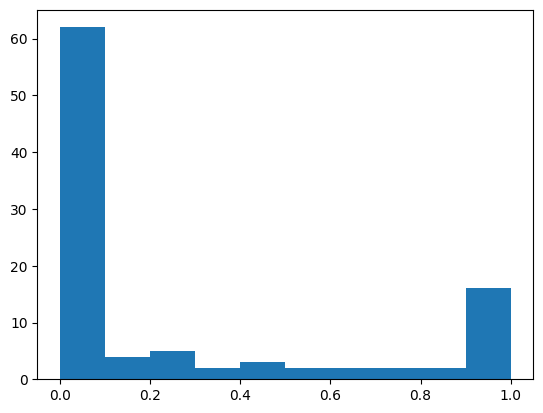

In [42]:
def get_accuracies(ds):
    accuracies = {feature: [] for feature in ds.features if 'accuracy' in feature}
    for i in range(len(ds)):
        for feature in accuracies:
            accuracies[feature].append(ds[i][feature])
   
    return accuracies

accuracies = get_accuracies(ds['train'])
plt.hist(accuracies['baseline_repaired_solution_accuracy'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


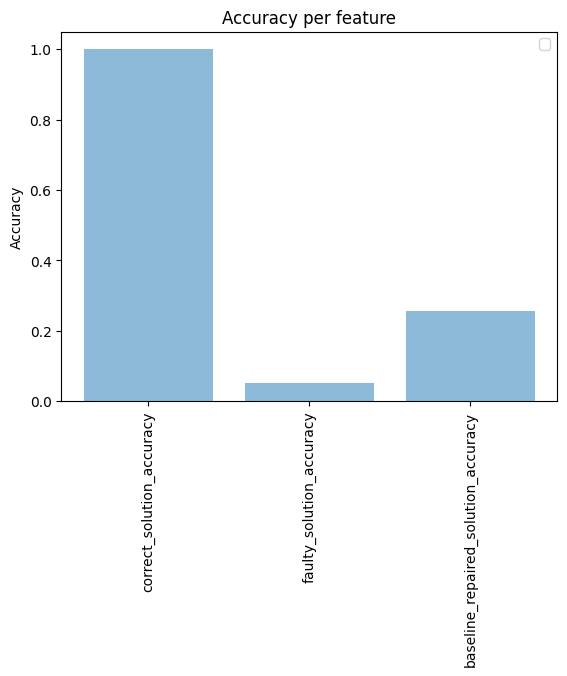

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(accuracies):

    plt.bar(range(len(accuracies)), [np.mean(accuracies[feature]) for feature in accuracies], align='center', alpha=0.5)
    plt.xticks(range(len(accuracies)), [feature for feature in accuracies])
    plt.ylabel('Accuracy')
    plt.title('Accuracy per feature')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

plot_accuracies(accuracies)